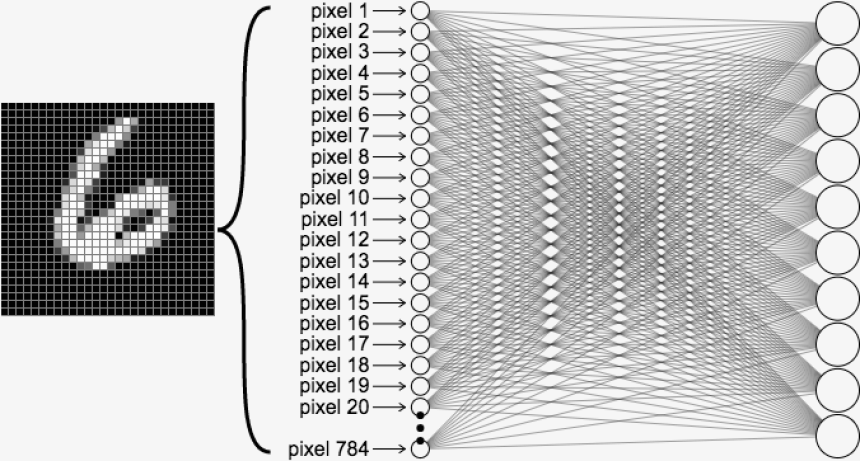

In [1]:
import torch # PyTorch
import torch.nn as nn # ML, DL models, layers
import torch.optim as optim # Optimization algorithms, e.g., Stochastic Gradient Descent, Adam,...

from torch.utils.data import DataLoader # 
import torchvision.datasets as datasets # some well-known dataset
import torchvision.transforms as transforms # Image data transformation

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_dataset = datasets.MNIST(root='/content/drive/MyDrive/datasets/mnist', train=True,
                               transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='/content/drive/MyDrive/datasets/mnist', train=False,
                               transform=transforms.ToTensor(), download=True)

In [5]:
import matplotlib.pyplot as plt

4


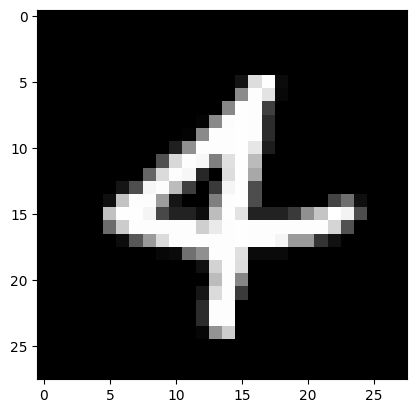

In [6]:
image, label = train_dataset[150]
print(label)
plt.imshow(image.squeeze(), cmap='gray')

In [7]:
# Hyper-parameters
input_size = 28*28 # 784
num_classes = 10 # digits 0, 1, 2, ..., 9
learning_rate = 0.001
batch_size = 64
num_epochs = 5

In [8]:
# Create a DataLoader to help PyTorch load the data efficiently
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [9]:
# Build a Softmax Regression model
class SoftmaxRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SoftmaxRegression, self).__init__()   # Python syntax
        #self.fc1 = nn.Linear(in_features=input_size, out_features=128) # fully-connected 1
        #self.fc2 = nn.Linear(in_features=128, out_features=num_classes)
        self.fc = nn.Linear(in_features=input_size, out_features=num_classes)

    def forward(self, x):
        out = self.fc(x)
        #out = self.fc1(x) # z-scores
        #out = torch.sigmoid(out)
        #out = self.fc2(out)
        #out = torch.softmax(out)    # No need for Softmax Regression!!!
        #out = torch.sigmoid(out)    # Required for Logistic Regression
        return out

In [10]:
# Create and initialize the model
model = SoftmaxRegression(input_size, num_classes).to(device)

In [11]:
# Declare the loss function and the optimization algorithm
# criterion = nn.BCELoss()  # Logistic Regression : NLL
criterion = nn.CrossEntropyLoss()  # Softmax Regression  : Softmax + NLL
#optimizer = optim.SGD(model.parameters(), lr=learning_rate)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [12]:
# Train our Softmax Regression model
for epoch in range(num_epochs):
    for batch_idx, (images, labels) in enumerate(train_loader):
        # Put the images and labels to GPU if available
        images = images.to(device)
        labels = labels.to(device)

        # Reshape our data
        # Because 'images' is a batch of 64 images, and each image has the shape 1x28x28
        # 'images' has the shape of 64x1x28x28. But our model receives the input size of 784.
        # Thus, we need to transform 1x28x28 ---> 784
        # images.shape[0] ---> 64. We want to keep this dimension.
        images = images.reshape(images.shape[0], -1) # (64, 1, 28, 28) --> (64, 784)

        # forward pass
        z_scores = model(images)  # We pass 64 images at a time through model.

        loss = criterion(z_scores, labels)

        # backward pass
        optimizer.zero_grad()    # empty the memory
        loss.backward()          # compute gradients
        optimizer.step()         # Perform one gradient step

        if(batch_idx+1) % 100 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Batch {batch_idx+1}, Loss: {loss.item():.2f}')

Epoch 1/5, Batch 100, Loss: 0.84
Epoch 1/5, Batch 200, Loss: 0.71
Epoch 1/5, Batch 300, Loss: 0.64
Epoch 1/5, Batch 400, Loss: 0.40
Epoch 1/5, Batch 500, Loss: 0.39
Epoch 1/5, Batch 600, Loss: 0.49
Epoch 1/5, Batch 700, Loss: 0.49
Epoch 1/5, Batch 800, Loss: 0.23
Epoch 1/5, Batch 900, Loss: 0.32
Epoch 2/5, Batch 100, Loss: 0.33
Epoch 2/5, Batch 200, Loss: 0.42
Epoch 2/5, Batch 300, Loss: 0.34
Epoch 2/5, Batch 400, Loss: 0.30
Epoch 2/5, Batch 500, Loss: 0.40
Epoch 2/5, Batch 600, Loss: 0.20
Epoch 2/5, Batch 700, Loss: 0.43
Epoch 2/5, Batch 800, Loss: 0.34
Epoch 2/5, Batch 900, Loss: 0.34
Epoch 3/5, Batch 100, Loss: 0.23
Epoch 3/5, Batch 200, Loss: 0.31
Epoch 3/5, Batch 300, Loss: 0.29
Epoch 3/5, Batch 400, Loss: 0.24
Epoch 3/5, Batch 500, Loss: 0.23
Epoch 3/5, Batch 600, Loss: 0.27
Epoch 3/5, Batch 700, Loss: 0.42
Epoch 3/5, Batch 800, Loss: 0.51
Epoch 3/5, Batch 900, Loss: 0.42
Epoch 4/5, Batch 100, Loss: 0.29
Epoch 4/5, Batch 200, Loss: 0.31
Epoch 4/5, Batch 300, Loss: 0.52
Epoch 4/5,

In [13]:
# Evaluate the accuracy of our model
def check_accuracy(loader, model):
    num_corrects = 0
    num_samples = 0

    model.eval()
    with torch.no_grad():
        for images, labels in loader:
            images = images.to(device)
            labels = labels.to(device)
            images = images.reshape(images.shape[0], -1)

            # forward pass
            z_scores = model(images)  # Processing 64 images at a time
            _, predictions = z_scores.max(1) # 0: is the first dimension ~ rows, 1: the second dimension ~ columns

            num_corrects += (predictions == labels).sum()
            num_samples += (predictions.size(0))   # predictions is of size (64,1)
        
        print(f'We get {num_corrects}/{num_samples} correct. Accuracy = {float(num_corrects)/float(num_samples)*100.0:.2f}')

In [14]:
check_accuracy(test_loader, model)

We get 9243/10000 correct. Accuracy = 92.43


In [15]:
from torchsummary import summary

In [16]:
summary(model, (1, 784))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 10]           7,850
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.03
Estimated Total Size (MB): 0.03
----------------------------------------------------------------


5


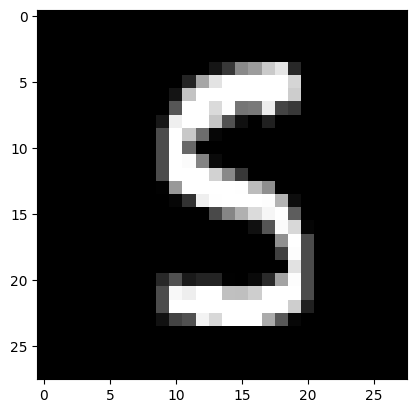

In [23]:
# Check a few images
image, label = test_dataset[240]
plt.imshow(image.squeeze(), cmap='gray')
print(label)

In [24]:
image = image.to(device)
image = image.reshape(image.shape[0], -1)  # (1,28,28) ---> (1, 784)
z_score = model(image)
print(z_score)
_, prediction = z_score.max(1)
print(f'The prediction is {prediction.item()}')

tensor([[ -3.7501,  -5.9654,  -1.9677,   1.9106,  -4.2909,   4.4032,  -2.0747,
         -11.0196,   3.1345,  -3.1137]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
The prediction is 5


In [25]:
model.state_dict()

OrderedDict([('fc.weight',
              tensor([[-0.0202,  0.0048, -0.0352,  ...,  0.0332, -0.0264,  0.0210],
                      [-0.0304, -0.0244, -0.0282,  ..., -0.0312,  0.0184, -0.0312],
                      [ 0.0062,  0.0138, -0.0204,  ...,  0.0186, -0.0107,  0.0113],
                      ...,
                      [-0.0231, -0.0264,  0.0065,  ..., -0.0306,  0.0344, -0.0205],
                      [-0.0075, -0.0182,  0.0308,  ...,  0.0241, -0.0339, -0.0040],
                      [-0.0063,  0.0054, -0.0033,  ...,  0.0342, -0.0339,  0.0125]],
                     device='cuda:0')),
             ('fc.bias',
              tensor([-0.2866,  0.4422,  0.0576, -0.2256,  0.1135,  0.6918, -0.0583,  0.4024,
                      -0.7997, -0.1498], device='cuda:0'))])

Getting the weights corresponding to the output neuron associated with digit 0.

In [20]:
weight_digit_0 = model.state_dict()['fc.weight'][3]
weight_digit_0.shape

torch.Size([784])

Transform the weight vector into a $28\times 28$ matrix.

In [21]:
weight_matrix = weight_digit_0.reshape(28,28).cpu().numpy()
print(weight_matrix.shape)

(28, 28)


Visualize the weight matrix.

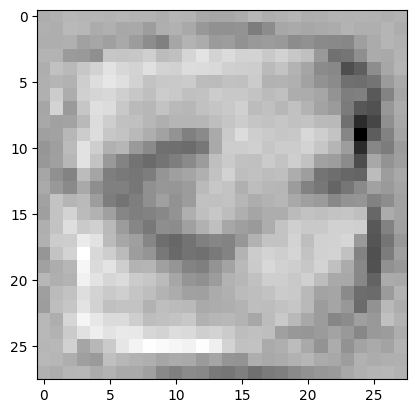

In [22]:
plt.imshow(weight_matrix, cmap='gray')

$\texttt{z_score_0} = w_0 + w_1 p_1 + w_2 p_2 + \ldots + w_{784} * p_{784}$

$\texttt{z_score_1} = w_0 + w_1 p_1 + w_2 p_2 + \ldots + w_{784} * p_{784}$

$\texttt{z_score_2} = w_0 + w_1 p_1 + w_2 p_2 + \ldots + w_{784} * p_{784}$

$\texttt{z_score_3} = w_0 + w_1 p_1 + w_2 p_2 + \ldots + w_{784} * p_{784}$

$\ldots$

$\texttt{z_score_9} = w_0 + w_1 p_1 + w_2 p_2 + \ldots + w_{784} * p_{784}$